# CSCI 381/780 (Fall 2023) - Project 2

**Due Date: Friday, October 27 by 4 PM**

## Description
In this project you will construct machine learning models on two different real-world datasets using unsupervised learning and regression.

## Instructions
1. In this project you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be initialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `ShuffleSplit`
- `KFold`
- `KMeans`
- `GridSearchCV`
- `Lasso`, `Ridge`, `ElasticNet`
- `MLPRegressor`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or **come to office hours should you need further assistance**.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above. 

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.


### Rubric

|**Part**|1.1|1.2|2.1|2.2|2.3|2.4|2.5|2.6|2.7|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|10|25|15|5|5|10|10|10|10|100|

# Part 1: Clustering

In this part of the project, you will be using data collected by the US Geological Survey and the US Forest Service. The data describes various cartographic and geologic features related to forest cover in US wilderness areas, with each sample representing a 30 x 30 meter cell.

The **goal** will be to *identify clusters* that represent forest cover types, and using these clusters *extract relationships* between forest covers and the provided cartographic/geologic features.

In [1]:
cuny_id = 23907251

In [2]:
cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col

In [3]:
print(cover_columns_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_0', 'Wilderness_1', 'Wilderness_2', 'Wilderness_3', 'Soil_0', 'Soil_1', 'Soil_2', 'Soil_3', 'Soil_4', 'Soil_5', 'Soil_6', 'Soil_7', 'Soil_8', 'Soil_9', 'Soil_10', 'Soil_11', 'Soil_12', 'Soil_13', 'Soil_14', 'Soil_15', 'Soil_16', 'Soil_17', 'Soil_18', 'Soil_19', 'Soil_20', 'Soil_21', 'Soil_22', 'Soil_23', 'Soil_24', 'Soil_25', 'Soil_26', 'Soil_27', 'Soil_28', 'Soil_29', 'Soil_30', 'Soil_31', 'Soil_32', 'Soil_33', 'Soil_34', 'Soil_35', 'Soil_36', 'Soil_37', 'Soil_38', 'Soil_39']


## 1.1 Load Data
Set the variable `COVER_FILE` to the **full path** to the forest cover dataset (**forest_cover_dataset.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `cover_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets). 

In [4]:
# 1.1.1

import pandas as pd
import numpy as np

COVER_FILE = "forest_cover_dataset.csv"
dataframe = pd.read_csv(COVER_FILE, names = cover_columns_names)
# print(dataframe.head(5))
print(f"NUMBER OF FEATURES: {len(dataframe.columns)}")

# categorical with one-hot encoding
categoric_features = ['Soil_', 'Wilderness_']

# numeric features alone are stored in cover_column_names (singular column)
numeric_features = cover_column_names

# categoric are stored in cover_columns_names (plural columns) along with numeric, need to separate out the numeric features
categoric_enumerated_features = [x for x in cover_columns_names if x not in cover_column_names]

print("\n\n\tCATEGORICAL FEATURES:")
for x in categoric_enumerated_features:
    print(f"\t\t{x}")

print("\tNUMERICAL FEATURES:")
for x in numeric_features:
    print(f"\t\t{x}")

NUMBER OF FEATURES: 54


	CATEGORICAL FEATURES:
		Wilderness_0
		Wilderness_1
		Wilderness_2
		Wilderness_3
		Soil_0
		Soil_1
		Soil_2
		Soil_3
		Soil_4
		Soil_5
		Soil_6
		Soil_7
		Soil_8
		Soil_9
		Soil_10
		Soil_11
		Soil_12
		Soil_13
		Soil_14
		Soil_15
		Soil_16
		Soil_17
		Soil_18
		Soil_19
		Soil_20
		Soil_21
		Soil_22
		Soil_23
		Soil_24
		Soil_25
		Soil_26
		Soil_27
		Soil_28
		Soil_29
		Soil_30
		Soil_31
		Soil_32
		Soil_33
		Soil_34
		Soil_35
		Soil_36
		Soil_37
		Soil_38
		Soil_39
	NUMERICAL FEATURES:
		Elevation
		Aspect
		Slope
		Horizontal_Distance_To_Hydrology
		Vertical_Distance_To_Hydrology
		Horizontal_Distance_To_Roadways
		Hillshade_9am
		Hillshade_Noon
		Hillshade_3pm
		Horizontal_Distance_To_Fire_Points


In [5]:
# 1.1.2
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# split into training/validation and test set
rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=cuny_id)
for i, (train_validation_index, test_index) in enumerate(rs.split(dataframe)):
    fcd_train_validation_dataframe = dataframe.iloc[train_validation_index]
    fcd_test_dataframe = dataframe.iloc[test_index]


# split into training and validation set
fcd_train_dataframe, fcd_validation_dataframe = train_test_split(fcd_train_validation_dataframe, test_size = 0.25, random_state = cuny_id)

# print(fcd_train_dataframe)
# print(fcd_validation_dataframe)
# print(fcd_test_dataframe)

In [6]:
# 1.1.3
from sklearn.preprocessing import StandardScaler

def standardize_maker(train, test, validation):
    # with_std = False !!
    # this ensures standardization does not take place, only scaling
    scaler = StandardScaler(with_std = False)

    # fit on training
    scaler = scaler.fit(train[numeric_features])
    
    standardize_train = train.copy(deep=True)
    standardize_train[numeric_features] = scaler.transform(standardize_train[numeric_features])

    scaler = scaler.fit(train[numeric_features])
    standardize_test = test.copy(deep=True)
    standardize_test[numeric_features] = scaler.transform(standardize_test[numeric_features])

    scaler = scaler.fit(train[numeric_features])
    standardize_validation = validation.copy(deep=True)
    standardize_validation[numeric_features] = scaler.transform(standardize_validation[numeric_features])

    

    return standardize_train, standardize_test, standardize_validation

st_fcd_train_dataframe, st_fcd_test_dataframe, st_fcd_validation_dataframe = standardize_maker(fcd_train_dataframe, fcd_test_dataframe, fcd_validation_dataframe)

# print(st_fcd_train_dataframe.head(3))
# print(fcd_train_dataframe.head(3))

## 1.2 $k$-Means Clustering

1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. Construct models for each value of $k$ specified in the ``k_values`` array below.
2. Apply the trained models to the validation dataset.
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```. For the validation models, you can utilize the function ```total_inertia``` provided below.
4. Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?
5. The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with inter-cluster distances from clusters in close proximity to each other. Utilize Scikit-learn's ```silhouette_score``` function [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to compute the silhouette coefficient for all values of $k$ on the *validation* set. Plot these values and determine via the elbow method which value of $k$ should be chosen. How does this value compare to the one chosen using mean inertia?
6. Using whichever value of $k$ you think is the best based on steps 4) and 5), create a plot for each feature that contains [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) of that feature for each cluster. Based upon these plots, determine which features you think are meaningful in discriminating between the clusters, as well as any other trends you observe.

### Please Read!
You may benefit from parallelizing the creation of the $k$-means models by using the Python package ```joblib```. I've included a code template below that you can customize. For additional details, please refer to [joblib's documentation](https://joblib.readthedocs.io/en/latest/parallel.html).

In [7]:
k_values=list(range(2,11))+[15,20]

In [8]:
# from joblib import Parallel, delayed, parallel_backend

# with parallel_backend("loky", inner_max_num_threads=2):
#     results = Parallel(n_jobs=4)(delayed(func)(x, y) for x, y in data)

In [9]:
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i in range(num_samples):
        sample = dataset.iloc[i]
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

In [10]:
# unused function written for 1.2.3

# def custom_total_inertia(distances_to_center, mean = False):
#     total_inertia_val = 0
#     for x in distances_to_center:
#         total_inertia_val += np.min(x)
#     if mean:
#         num_rows,_ = distances_to_center.shape
#         total_inertia_val = total_inertia_val / num_rows
#     return total_inertia_val

In [11]:
# 1.2.1 / 1.2.2 / 1.2.3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_validation_mean_inertia = []

# check two methods of inertia to ensure results are accurate
k_train_mean_inertia = []
k_train_test_mean_inertia = []

# sillhouette score
s_score = []

# full results for trial k
k_predict_full_dictionary = {}

for k in k_values:

    # 1.2.1
    kmean = KMeans(n_clusters=k, random_state=cuny_id, n_init="auto").fit(st_fcd_train_dataframe)

    # 1.2.2
    k_predict = kmean.predict(st_fcd_validation_dataframe)
    k_predict_full_dictionary[k] = k_predict
    distances_to_center = kmean.transform(st_fcd_validation_dataframe)

    # 1.2.3
    # print(distances_to_center)
    # mean_inertia_val = custom_total_inertia(distances_to_center, True)
    mean_inertia_val = total_inertia(st_fcd_validation_dataframe, kmean.cluster_centers_, k_predict)
    k_validation_mean_inertia.append((k, mean_inertia_val))
    print(f"validation mean inertia: {mean_inertia_val} for k {k}")

    # compute inertia with two different methods
    k_train_test_mean_inertia.append(total_inertia(st_fcd_train_dataframe, kmean.cluster_centers_, kmean.predict(st_fcd_train_dataframe)))
    k_train_mean_inertia.append((k, kmean.inertia_ / st_fcd_train_dataframe.shape[0]))

    result = silhouette_score(st_fcd_validation_dataframe, k_predict)
    print(f"sillhouette score: {result}")
    s_score.append(result)

# 1.2.3
for k_index in range(len(k_values)):
    print(f"Mean inertias for k-value {k_values[k_index]}")
    print(f"\tTrain: {k_train_mean_inertia[k_index][1]}")
    print(f"\tValidation: {k_validation_mean_inertia[k_index][1]}")

# 1.2.5
for k_index in range(len(k_values)):
    print(f"Sillhouette score for k-value {k_values[k_index]}: {s_score[k_index]}")

print("cell finished")
# print(k_train_mean_inertia)
# print(k_validation_mean_inertia)
# print(k_train_test_mean_inertia)
# print(s_score)

validation mean inertia: 2333352.5441019675 for k 2
sillhouette score: 0.46125334895138725
validation mean inertia: 1638839.2192836325 for k 3
sillhouette score: 0.44032839275901636
validation mean inertia: 1268903.1731350645 for k 4
sillhouette score: 0.3441906710780838
validation mean inertia: 1003897.0942689707 for k 5
sillhouette score: 0.352239227591832
validation mean inertia: 884572.6023094665 for k 6
sillhouette score: 0.34169819003806523
validation mean inertia: 767208.1090882382 for k 7
sillhouette score: 0.33605045547233525
validation mean inertia: 703781.7224183519 for k 8
sillhouette score: 0.3034781610885721
validation mean inertia: 634192.3116141993 for k 9
sillhouette score: 0.29698271239666213
validation mean inertia: 576749.0410561132 for k 10
sillhouette score: 0.2929112193241954
validation mean inertia: 441002.37035918987 for k 15
sillhouette score: 0.25530316491960947
validation mean inertia: 342472.8306905623 for k 20
sillhouette score: 0.2571427762460762
Mean ine

NOTE: my computer ran the above within a short enough time frame, and I could not get joblib working properly, so since it was optional I decided to not use joblib

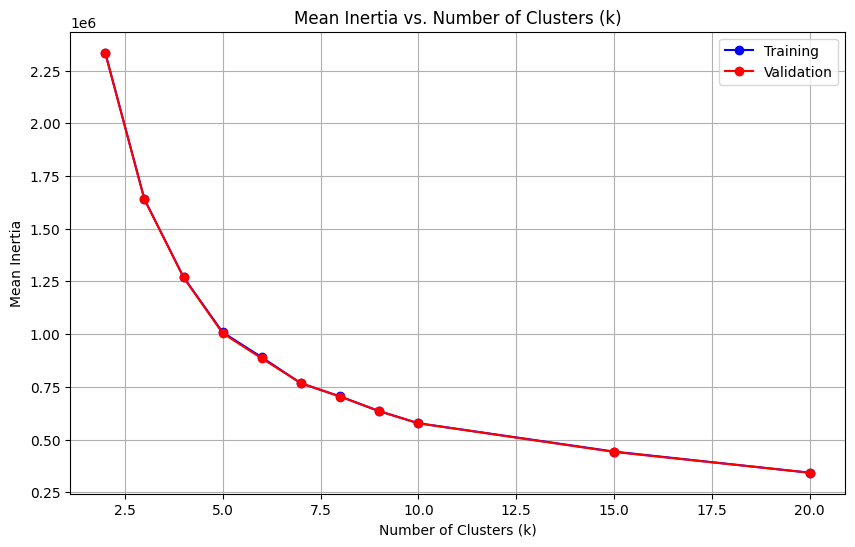

In [12]:
# 1.2.4

import matplotlib.pyplot as plt
k_train_just_mean_inertia = [x[1] for x in k_train_mean_inertia]
k_validation_just_mean_inertia = [x[1] for x in k_validation_mean_inertia]

plt.figure(figsize=(10, 6))

plt.plot(k_values, k_train_just_mean_inertia, marker='o', label='Training', color='blue')
plt.plot(k_values, k_validation_just_mean_inertia, marker='o', label='Validation', color='red')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Inertia')
plt.title('Mean Inertia vs. Number of Clusters (k)')

plt.legend()
plt.grid(True)
plt.show()


1.2.4

It seems that the elbow is at k = 5 or k = 7 (considering only the validation set plot), since the decrease in mean inertia for the validation set slows down rapidly afer those two points with each additional cluster

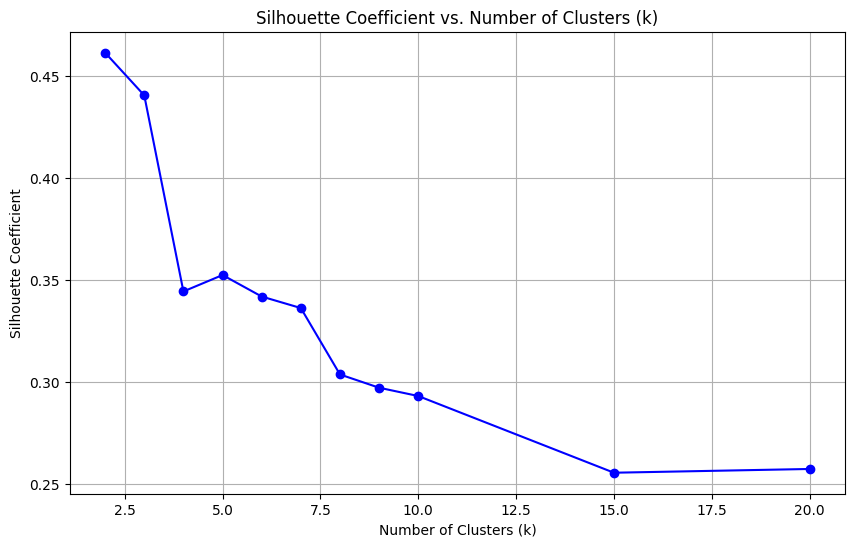

In [13]:
# 1.2.5

plt.figure(figsize=(10, 6))

plt.plot(k_values, s_score, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs. Number of Clusters (k)')

plt.grid(True)
plt.show()

1.2.5

using this method, I would choose the elbow at either k = 4 or k = 8, leaning towards k = 4. this does not fully agree with the previous k-value which I determined to be k = 5 or k = 7

1.2.6

since my two candidates from 1.1.4 were k = 5 and k = 7, and my two candidates from 1.1.5 were k = 4 and k = 8, I will take the average of all 4
(4 + 5 + 7 + 8) / 4 = 6
therefore, I will choose k = 6

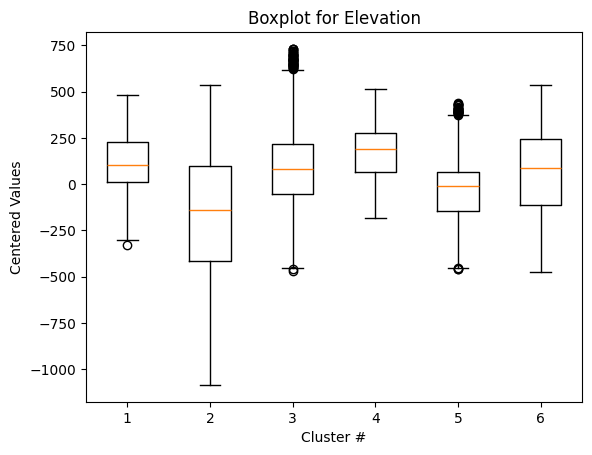

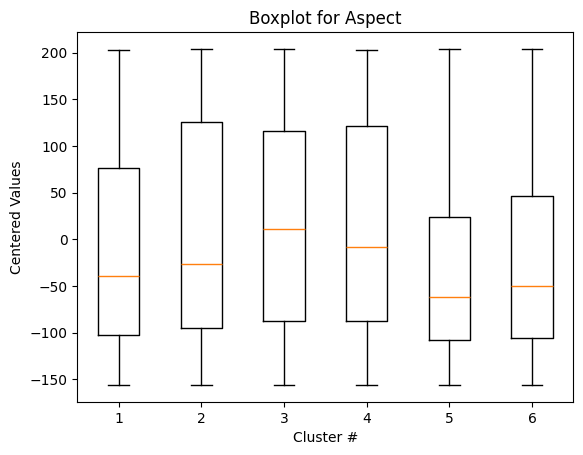

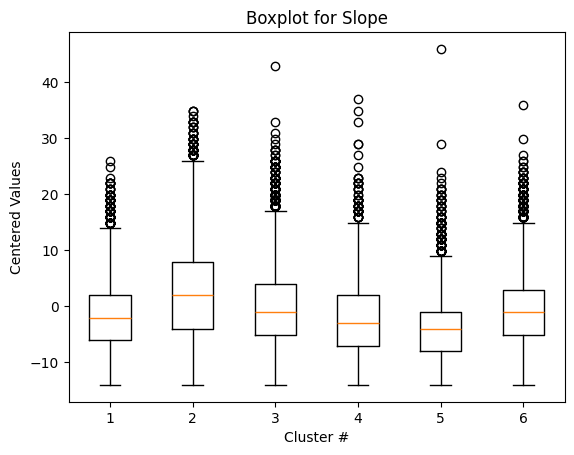

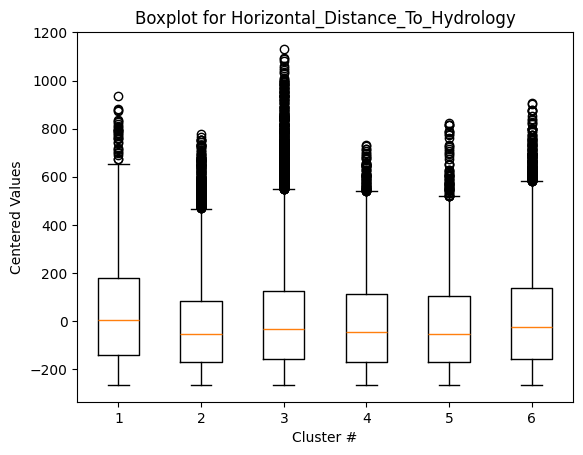

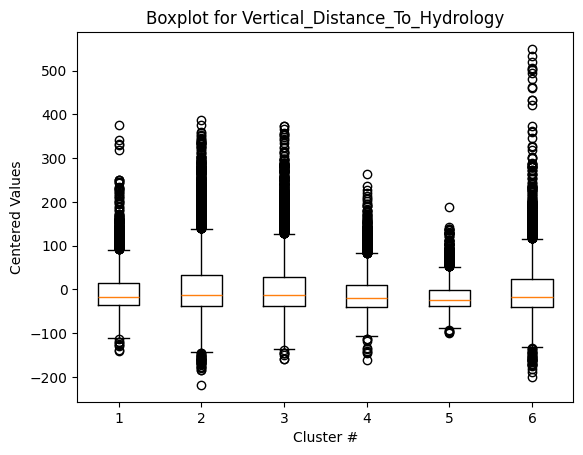

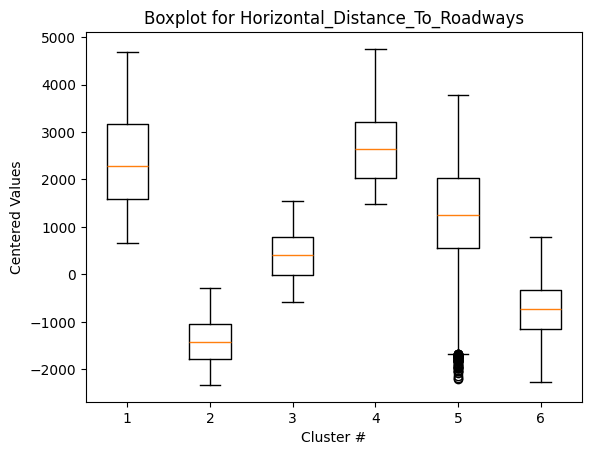

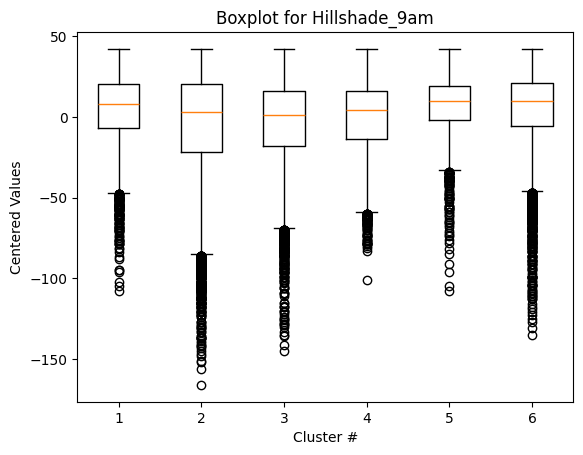

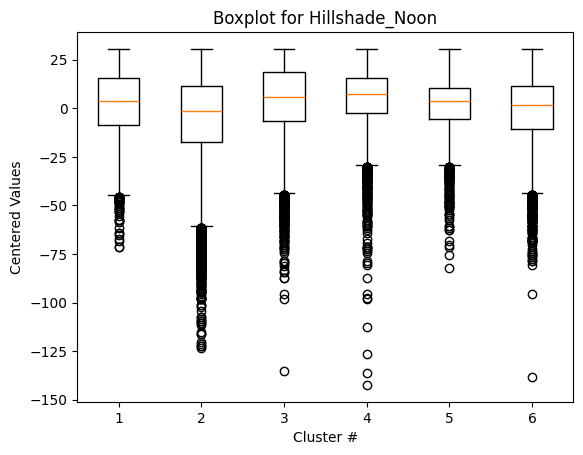

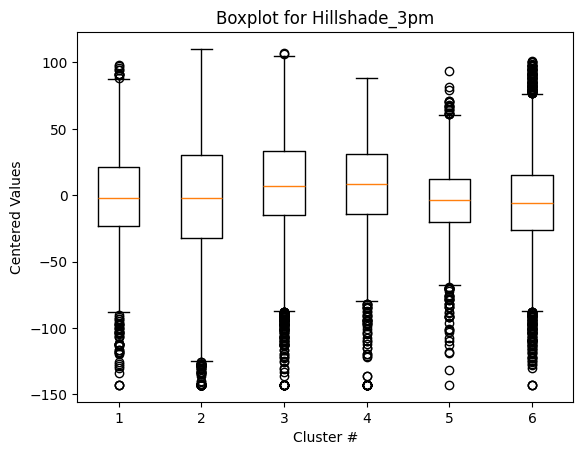

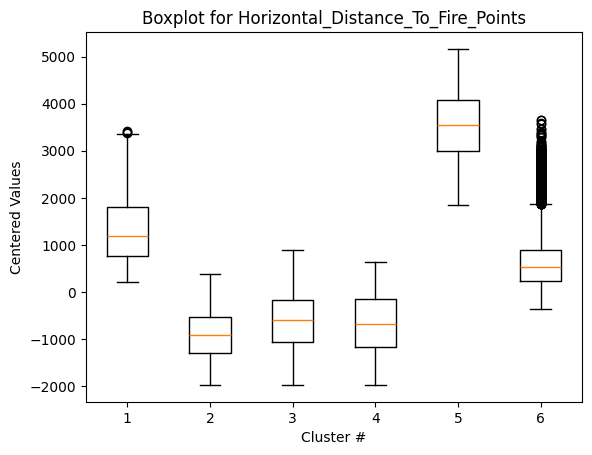

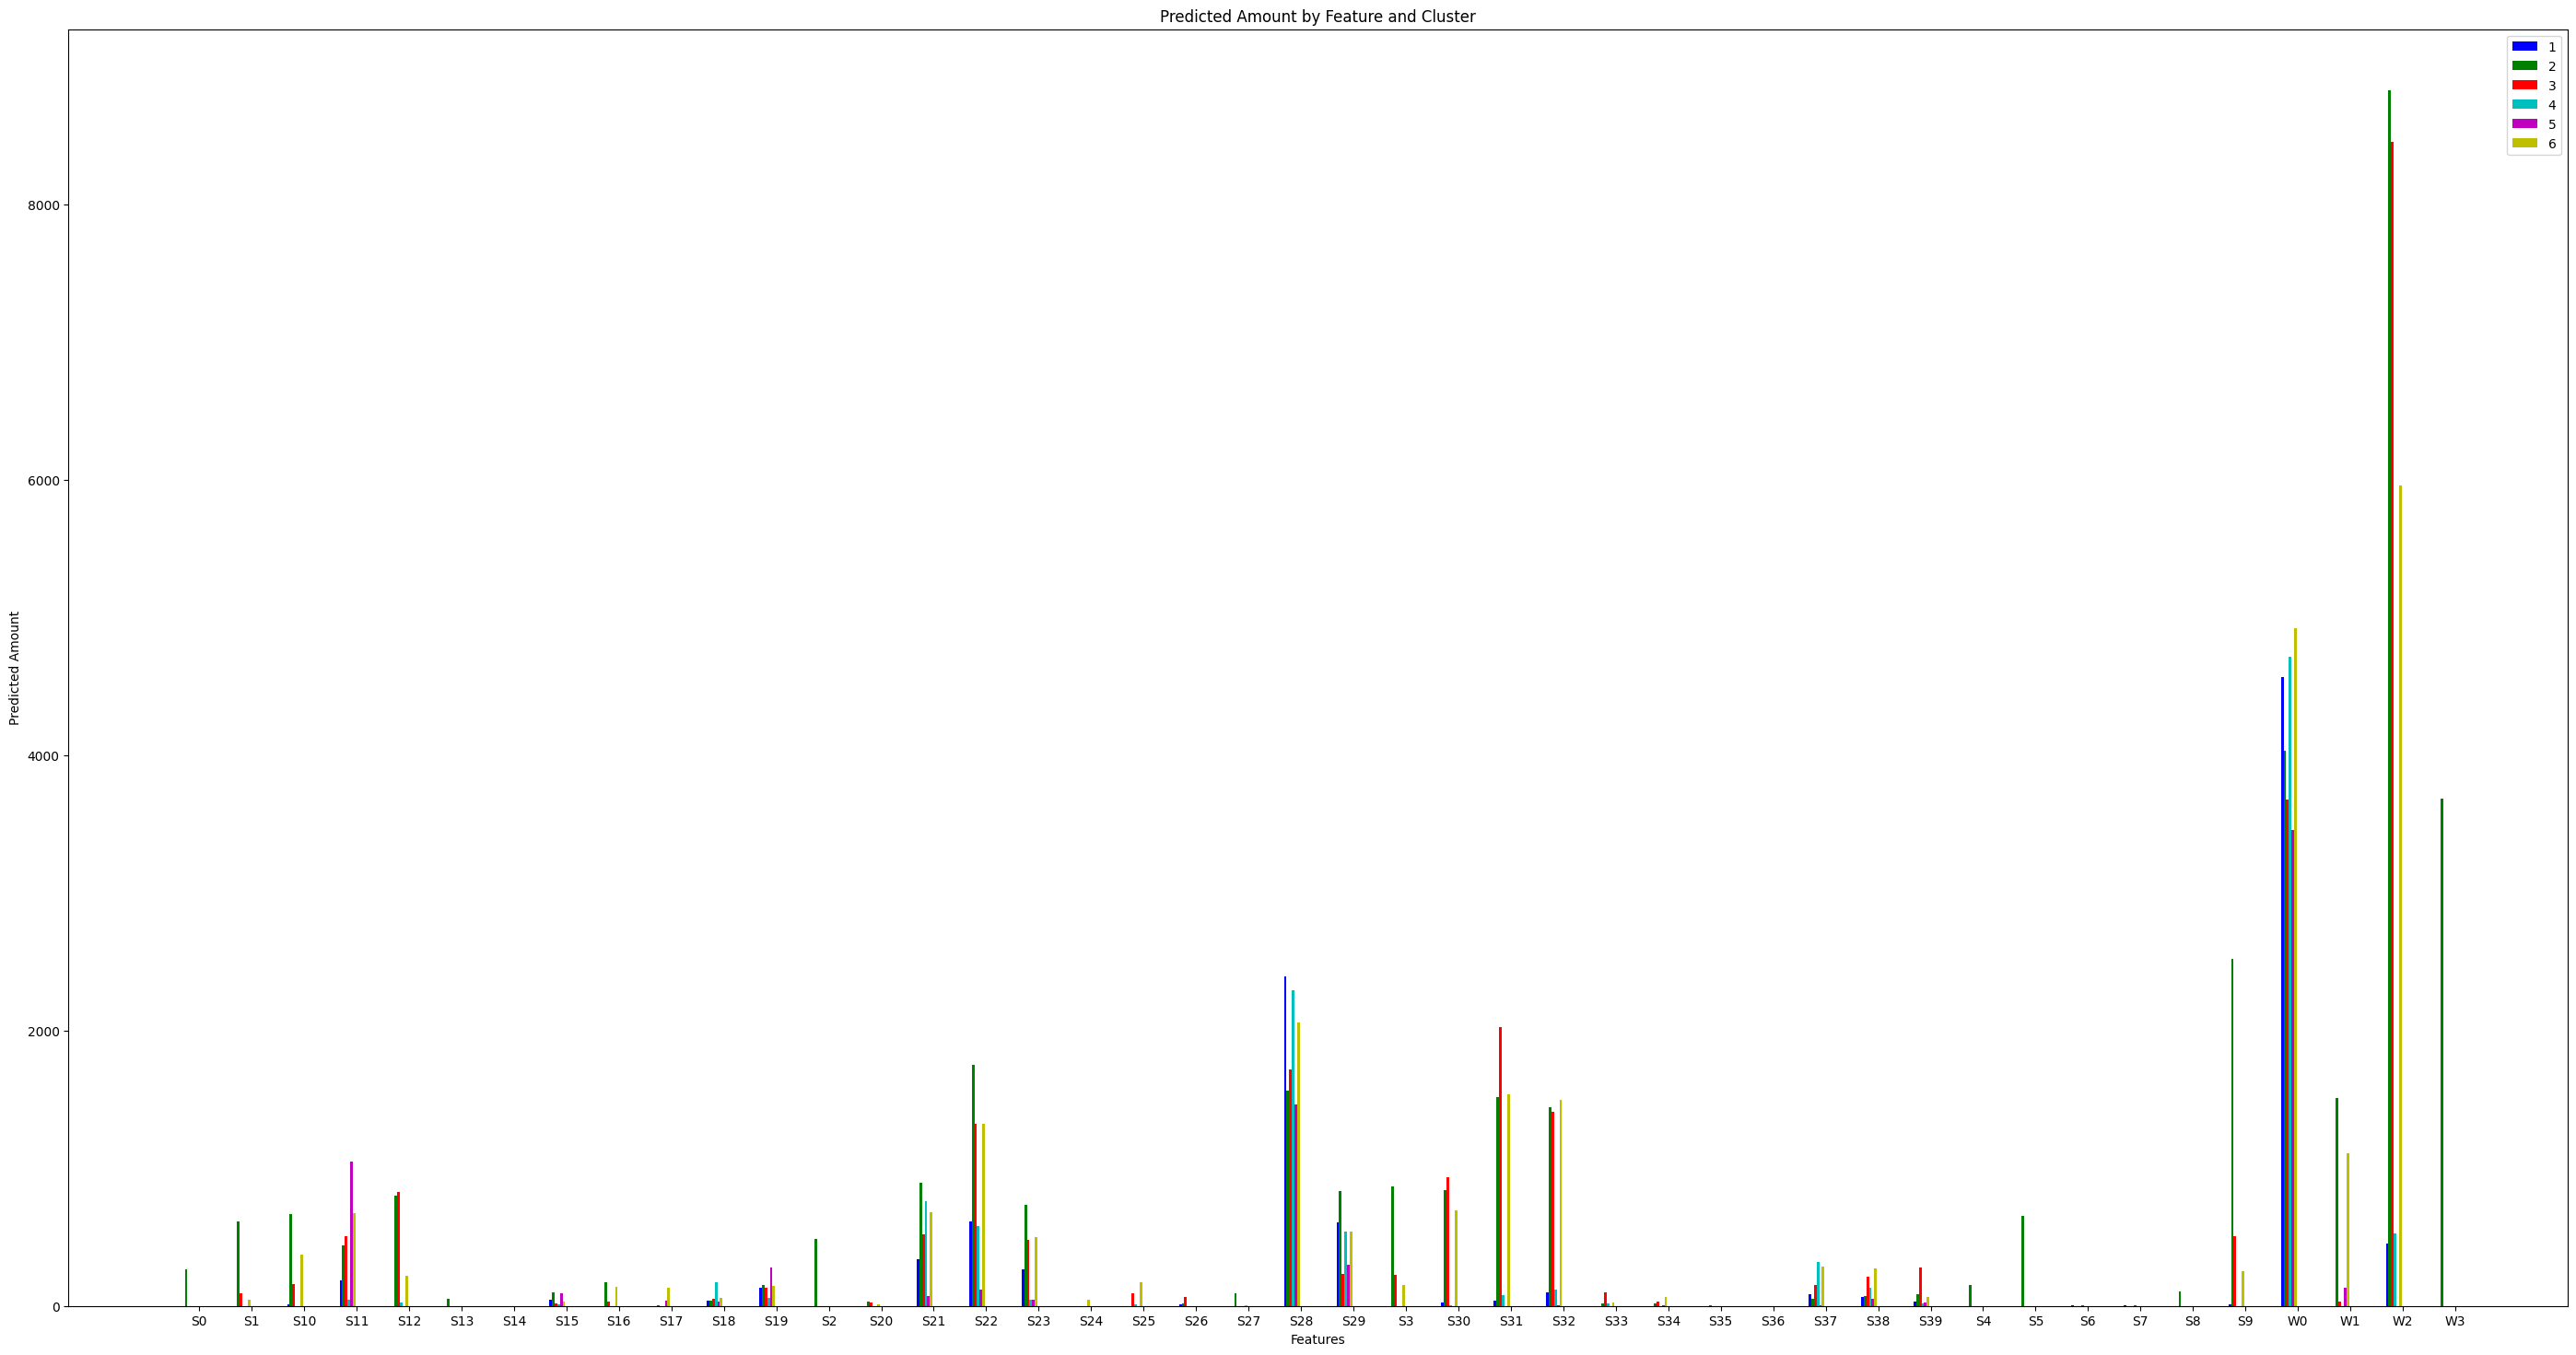

In [14]:
# 1.2.6

import matplotlib.pyplot as plt
import numpy as np

chosen_k = 6
chosen_k_predicted_clusters = k_predict_full_dictionary[chosen_k]

# a list of dataframes containing only the relevant rows for each cluster, of size k
# for example, all rows predicted to be in cluster 3 will be at the third index (or technically fourth because of zero indexing)
selected_rows_dataframe = []


# a list of lists, which at each index 0 through k - 1 will store feature values found in that cluster
cluster_feature_values = []


for k in range(chosen_k):

    # find which indices were predicted to be the given cluster value
    cluster_feature_values.append(np.where(chosen_k_predicted_clusters == k))

    # select those rows for the dataframe at the given index
    selected_rows_dataframe.append(st_fcd_validation_dataframe.iloc[cluster_feature_values[k]])


# loop through the numeric features to graph the boxplots
for feature in st_fcd_validation_dataframe[numeric_features].columns:

    # store the data for each cluster
    data = []
    
    for x in range(chosen_k):
        
        # collect data at given cluster index
        data.append(selected_rows_dataframe[x][feature])

    plt.boxplot(data)
    
    plt.xlabel('Cluster #')
    plt.ylabel('Centered Values')
    plt.title(f"Boxplot for {feature}")
    plt.show()



# to visualize categorical features, make a bar graph for each to have a rough estimate of how impactful the categorical feature are
# data transformation is required
# list storing tuples containing feature name, cluster number, and amount for that given feature name : cluster number pairing
featurename_clusternumber_amount = []

for feature in st_fcd_validation_dataframe[categoric_enumerated_features].columns:

    chosen_indices = np.where(st_fcd_validation_dataframe[feature] == 1)
    for x in range(chosen_k):
        predicted_cluster_for_given_index_in_a_list = cluster_feature_values[x]      
        intersection_of_cluster_assigned_and_feature_value_equals_one = np.intersect1d(chosen_indices, predicted_cluster_for_given_index_in_a_list)
        featurename_clusternumber_amount.append((feature, x, len(intersection_of_cluster_assigned_and_feature_value_equals_one)))
        
feature_name_list = list(sorted(set([x[0] for x in featurename_clusternumber_amount])))

feature_data = {}

# populate a dictionary with the data
for feature, _, _ in featurename_clusternumber_amount:
    feature_data[feature] = {}

# populate a dictionary with the data
for feature, cluster, amount in featurename_clusternumber_amount:
    feature_data[feature][cluster] = amount


#2D list where first index is cluster, second index is feature amount
cluster_feature_value_lists = []

for cluster_index in range(chosen_k):
    cluster_feature_value_list = []
    for feature in feature_name_list:
        cluster_feature_value_list.append(feature_data[feature][cluster_index])
    cluster_feature_value_lists.append(cluster_feature_value_list)


N = len(feature_name_list)
ind = np.arange(N)  
width = .05

plt.figure(figsize=(35, 18))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
bars = []

for k in range(chosen_k):
    bar = plt.bar(ind + width * k, cluster_feature_value_lists[k], width, color=colors[k % 7])
    bars.append(bar)

plt.xlabel("Features") 
plt.ylabel('Predicted Amount') 
plt.title("Predicted Amount by Feature and Cluster") 

shortened_feature_name_list = [x[0] + x[-2:].replace("_","") for x in feature_name_list]
# print(shortened_feature_name_list)

plt.xticks(ind+width*chosen_k,shortened_feature_name_list) 
plt.legend( bars, range(1, chosen_k + 1) ) 

plt.show() 


First looking at the numeric features, distance to roadways and distance to firepoints appear to have been the most significant features, since they have the largest differences between boxplots for the different cluster numbers. These are followed roughly by slope, aspect, and elevation.

For the categoric features, I created a bargraph just so I could see if they are being relied on heavily in classifying. Since certain categories being true (for example, soil_5 and wilderness_3) clearly heavily impact which cluster the example is assigned to, speaking very generally, the categoric features (soil and wilderness) are both clearly playing an important role. Further analysis would be required to determine how large of a role these features are playing.

It is also interesting that some features did not seem to have any impact, like the hillshade. I wonder if model performance would be improved by removing these features, especially since we are using clustering in which extraneous information can harm model performance.

# Part 2: Regression

In this part of the project, you will be utilizing a US database of crime and law enforcement statistics broken down by US Census communities. The **goal** will be to create *regression models* that predict *per capita violent crimes* (the response variable `ViolentCrimesPerPop`) for a given community based on these inputs. 

In [15]:
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

## 2.1 Load Data
Set the variable `CRIME_FILE` to the **full path** to the forest cover dataset (**crime.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `crime_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.
4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

**Please note!** The Scikit-learn function `SimpleImputer` does not work as expected when the feature to impute is numerical but the missing values are not. One way to solve this is to first replace the missing values with NaN values (e.g., `np.nan`) using the Pandas Dataframe method `replace` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

In [16]:
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

In [17]:
# pre 2.1.1

CRIME_FILE = "crime.csv"
dataframe = pd.read_csv(CRIME_FILE, names = crime_column_names)

# right away, replace '?' with NaN
dataframe.replace({'?': np.nan}, inplace=True)
print(dataframe.head(3))

   state county community communityname  fold  population  householdsize  \
0      8    NaN       NaN  Lakewoodcity     1        0.19           0.33   
1     53    NaN       NaN   Tukwilacity     1        0.00           0.16   
2     24    NaN       NaN  Aberdeentown     1        0.00           0.42   

   racepctblack  racePctWhite  racePctAsian  ...  LandArea  PopDens  \
0          0.02          0.90          0.12  ...      0.12     0.26   
1          0.12          0.74          0.45  ...      0.02     0.12   
2          0.49          0.56          0.17  ...      0.01     0.21   

   PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0            0.20       0.06           0.04                  0.9   
1            0.45        NaN            NaN                  NaN   
2            0.02        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1        

In [18]:
# 2.1.1

print(f"NUMBER OF FEATURES: {len(dataframe.columns)}")

data_types = dataframe.dtypes
data_columns = dataframe.columns


# the above was not helpful so I went into the data myself, researched, and manually figured out which variables were which type
# state, county, community code, and communityname have no reason to be predictive (if they could even be made numerical for some of them), so I will drop them
# fold seems to be for cross-validation but I will be doing that myself, so I will drop it
# all features appear to be numeric, as they are almost all either percentages or total number
# also ensure that the label is not placed into numeric features

numeric_features = [x for x in data_columns if x not in ['state', 'county', 'community', 'communityname', 'fold', 'ViolentCrimesPerPop']]
label = ['ViolentCrimesPerPop']

for numeric_feature in numeric_features:
    print(f"{numeric_feature}: numeric")

dataframe = dataframe[numeric_features + label]

print("state, county, community, communityname, fold all removed - see comments above for details")

NUMBER OF FEATURES: 128
population: numeric
householdsize: numeric
racepctblack: numeric
racePctWhite: numeric
racePctAsian: numeric
racePctHisp: numeric
agePct12t21: numeric
agePct12t29: numeric
agePct16t24: numeric
agePct65up: numeric
numbUrban: numeric
pctUrban: numeric
medIncome: numeric
pctWWage: numeric
pctWFarmSelf: numeric
pctWInvInc: numeric
pctWSocSec: numeric
pctWPubAsst: numeric
pctWRetire: numeric
medFamInc: numeric
perCapInc: numeric
whitePerCap: numeric
blackPerCap: numeric
indianPerCap: numeric
AsianPerCap: numeric
OtherPerCap: numeric
HispPerCap: numeric
NumUnderPov: numeric
PctPopUnderPov: numeric
PctLess9thGrade: numeric
PctNotHSGrad: numeric
PctBSorMore: numeric
PctUnemployed: numeric
PctEmploy: numeric
PctEmplManu: numeric
PctEmplProfServ: numeric
PctOccupManu: numeric
PctOccupMgmtProf: numeric
MalePctDivorce: numeric
MalePctNevMarr: numeric
FemalePctDiv: numeric
TotalPctDiv: numeric
PersPerFam: numeric
PctFam2Par: numeric
PctKids2Par: numeric
PctYoungKids2Par: num

In [19]:
# 2.1.2

# split into training/validation and test set
rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=cuny_id)
for i, (train_validation_index, test_index) in enumerate(rs.split(dataframe)):
    cr_train_validation_dataframe = dataframe.iloc[train_validation_index]
    cr_test_dataframe = dataframe.iloc[test_index]


# split into training and validation set
cr_train_dataframe, cr_validation_dataframe = train_test_split(cr_train_validation_dataframe, test_size = 0.25, random_state = cuny_id)

# print(cr_train_dataframe.head(3))

In [20]:
# 2.1.3
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=cuny_id)

# store the training dataframes for cross validation
cr_cv_train_dataframes = []

# store the validation dataframes for cross validation
cr_cv_validation_dataframes = []

# notice the use of the combined train and validation dataframe
for train_index, validation_index in kf.split(cr_train_validation_dataframe):
    train_fold, validation_fold = cr_train_validation_dataframe.iloc[train_index], cr_train_validation_dataframe.iloc[validation_index]
    cr_cv_train_dataframes.append(train_fold)
    cr_cv_validation_dataframes.append(validation_fold)

In [21]:
from sklearn.impute import SimpleImputer

def impute_with_median_and_drop(df_fit, df_transform_list):
    """
    function to impute data and fit using df_fit, and then transform on a list of dataframes (as well as on training)
    data is imputed using median for missing values, and columns with more than 25% data missing are removed
    """
    
    imputer = SimpleImputer(strategy='median')
    df_fit_copy = df_fit.copy()
    dropped_columns = []
    df_transform_copy_list = [x.copy() for x in df_transform_list]

    
    for col in df_fit_copy.columns:
        
        # check the percentage of nan values in the column
        nan_percentage = df_fit_copy[col].isnull().mean()
        
        # if column has more than 25% missing, drop the column
        if nan_percentage > 0.25:
            dropped_columns.append(col)
            df_fit_copy.drop(col, axis=1, inplace=True) 
            for df_transform_copy in df_transform_copy_list:
                df_transform_copy.drop(col, axis=1, inplace=True)
            
        else:
            col_data = df_fit_copy[col].values.reshape(-1, 1)
            df_fit_copy[col] = imputer.fit_transform(col_data)
            for df_transform_copy in df_transform_copy_list:
                col_data = df_transform_copy[col].values.reshape(-1, 1)
                df_transform_copy[col] = imputer.transform(col_data)

    return df_fit_copy, df_transform_copy_list

# print(cr_train_dataframe.head(3))


impute_cr_train_dataframe, test_val_list = impute_with_median_and_drop(cr_train_dataframe, [cr_validation_dataframe, cr_test_dataframe])
impute_cr_validation_dataframe, impute_cr_test_dataframe = test_val_list[0], test_val_list[1]

# recalculate the features
numeric_features = [x for x in impute_cr_train_dataframe.columns if x != label[0]]
# print(numeric_features)

# do the same for cross validation dataframes
impute_cr_cv_train_dataframes = []
impute_cr_cv_validation_dataframes = []
for index in range(len(cr_cv_train_dataframes)):
    impute_train, impute_val = impute_with_median_and_drop(cr_cv_train_dataframes[index], [cr_cv_validation_dataframes[index]])
    impute_cr_cv_train_dataframes.append(impute_train)
    impute_cr_cv_validation_dataframes.append(impute_val)

# for future parts, get a dataframe fit on both train and validation
impute_cr_train_validation_dataframe, temp = impute_with_median_and_drop(cr_train_validation_dataframe, [cr_test_dataframe])

impute_cr_test_full_dataframe = temp[0]

# print(impute_cr_cv_train_dataframes[3])
# print(cr_cv_train_dataframes[3])

                                                           
# print(cr_train_dataframe.head(5))
# print(impute_cr_train_dataframe.head(5))
# print(impute_cr_validation_dataframe.head(5))

## 2.2 Linear Regression

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
2. Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.
    
    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?
3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.
    
    Using this interpretation, describe the most significant features and their correlation.

In [22]:
# 2.2.1
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(impute_cr_train_dataframe[numeric_features], impute_cr_train_dataframe[label])

In [23]:
# 2.2.2

y_predict_train = reg.predict(impute_cr_train_dataframe[numeric_features])
y_train = impute_cr_train_dataframe[label]

y_predict_val = reg.predict(impute_cr_validation_dataframe[numeric_features])
y_val = impute_cr_validation_dataframe[label]

train_results = p2_metrics(y_train, y_predict_train)
val_results = p2_metrics(y_val, y_predict_val)

print("Training Results:")
for metric, value in train_results.items():
    print(f"\t{metric}:  {value}")

print("Validation Results:")
for metric, value in val_results.items():
    print(f"\t{metric}:  {value}")

Training Results:
	mse:  0.015474297252849094
	mae:  0.0877348044384185
	r2:  0.7198358888972728
Validation Results:
	mse:  0.021819152473692503
	mae:  0.10363648838926257
	r2:  0.590101674440971


2.2.2

I would not say the model is underfitting the data necessarily. The data is expected to have a lot of noise considering how many features there are and how much crime rates can vary. An r^2 value of 0.72 on the training data means the model is able to capture a large portion of the variance in crime rate using the features. 

In [24]:
# 2.2.3

weights = reg.coef_
feature_weight_tuples = []

for feature, weight in zip(numeric_features, weights[0]):
    feature_weight_tuples.append((feature, weight))

sorted_feature_weight_tuples = sorted(feature_weight_tuples, key=lambda x: x[1])

for metric, value in sorted_feature_weight_tuples:
    print(f"\t{metric}:  {value}")

	PctLargHouseOccup:  -0.7631906703604544
	PctRecImmig5:  -0.7339207640584899
	whitePerCap:  -0.6069187856835325
	PctPersOwnOccup:  -0.6040665566995557
	OwnOccLowQuart:  -0.5896459978554126
	TotalPctDiv:  -0.587119865674975
	PersPerFam:  -0.4107113802956514
	agePct12t29:  -0.34436050810753116
	PctRecImmig10:  -0.2972558520962616
	pctWWage:  -0.2675049569664381
	PctWorkMom:  -0.24123856725079312
	numbUrban:  -0.23204814362865442
	RentLowQ:  -0.20779975004591558
	NumIlleg:  -0.19354673937475786
	PctImmigRec8:  -0.189238113458499
	NumImmig:  -0.18828989644677183
	pctWInvInc:  -0.18761289127297004
	PersPerRentOccHous:  -0.14701384904266357
	PctKids2Par:  -0.1390006625304891
	PctPopUnderPov:  -0.13792687606470225
	racePctWhite:  -0.1275646435396455
	PctLess9thGrade:  -0.10257652859818503
	PctNotSpeakEnglWell:  -0.09845122804698939
	PctHousOccup:  -0.0937797943604956
	MedOwnCostPctInc:  -0.0859940123277321
	pctWRetire:  -0.07889262438514089
	agePct16t24:  -0.07378995023241808
	PctEmplManu:  -

In [25]:
# 2.2.3
sorted_abs_feature_weight_tuples = sorted(feature_weight_tuples, key=lambda x: abs(x[1]))

n = 10
sorted_abs_feature_weight_tuples.reverse()
top_n_features = sorted_abs_feature_weight_tuples[:n]

# print(top_n_features)
print(f"Below are the correlations for the top {n} features")
for feature, weight in top_n_features:
    feature_dataframe = impute_cr_train_dataframe[[feature] + label]
    # print(feature_dataframe)
    correlation = feature_dataframe[feature].corr(feature_dataframe[label[0]])
    print(f"\t{feature}:  {correlation}")

Below are the correlations for the top 10 features
	PctRecImmig8:  0.2647333463752721
	PctLargHouseOccup:  0.33601810971061974
	PctRecImmig5:  0.25602089100207487
	whitePerCap:  -0.2368233721731691
	PctPersOwnOccup:  -0.5417240161540953
	PersPerOccupHous:  -0.014096990697040035
	PctLargHouseFam:  0.42802844533783974
	OwnOccLowQuart:  -0.21939088863591202
	TotalPctDiv:  0.5558762536261642
	OwnOccMedVal:  -0.20070115961861332


2.2.3

The most significant features, along with their correlation with the original labels, can be seen above. Those with higher positive values are more positively correlated with the labels, those with more negative are more negatively correlated, and those closer to 0 show less correlation in either direction.

## 2.3 Linear Regression and PCA

1. Perform principal component analysis on the **training data**. You may use Scikit-learn's `PCA` function for this, which **automatically centers** the data prior to PCA. Using PCA, *choose the number of components* for which the total explained variance is $\ge 99\%$, and report this.
2. After determining the correct number of components, apply the PCA transformation to the **validation** and **test** sets.
3. Create another model via `LinearRegression` but using the data transformed by PCA
Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

In [26]:
# 2.3.1 / 2.3.2

from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')

pca.fit(impute_cr_train_dataframe[numeric_features])

# transform datasets
pca_impute_cr_train_dataframe_numeric_features = pca.transform(impute_cr_train_dataframe[numeric_features])
pca_impute_cr_validation_dataframe_numeric_features = pca.transform(impute_cr_validation_dataframe[numeric_features])
pca_impute_cr_test_dataframe_numeric_features = pca.transform(impute_cr_test_dataframe[numeric_features])

# report results
number_of_components_pca = len(pca.explained_variance_ratio_)

print(f"Number of components to capture >99% variance: {number_of_components_pca}")

Number of components to capture >99% variance: 57


In [27]:
# 2.3.3 / 2.3.4

reg = LinearRegression().fit(pca_impute_cr_train_dataframe_numeric_features, impute_cr_train_dataframe[label])

# print(pca_impute_cr_train_dataframe_numeric_features)
# print(pca_impute_cr_validation_dataframe_numeric_features)

y_predict_pca_train = reg.predict(pca_impute_cr_train_dataframe_numeric_features)
y_pca_train = impute_cr_train_dataframe[label]

y_predict_pca_val = reg.predict(pca_impute_cr_validation_dataframe_numeric_features)
y_pca_val = impute_cr_validation_dataframe[label]

train_pca_results = p2_metrics(y_pca_train, y_predict_pca_train)

val_pca_results = p2_metrics(y_pca_val, y_predict_pca_val)

print("PCA Training Results:")
for metric, value in train_pca_results.items():
    print(f"\t{metric}:  {value}")

print("PCA Validation Results:")
for metric, value in val_pca_results.items():
    print(f"\t{metric}:  {value}")

PCA Training Results:
	mse:  0.01687174912743793
	mae:  0.09085985602401453
	r2:  0.6945348457638965
PCA Validation Results:
	mse:  0.02166523928710767
	mae:  0.10249585707454044
	r2:  0.5929931138558906


2.3.4
the performance is slightly lower for the training data - this signals that the model is avoiding overfitting with the PCA reduced dimensionality. 

the performance is slightly higher for the validation data, but so close as to not be able to draw significant conclusions, other than to say the variance was successfully captured (seemingly) during the PCA dimensionality reduction.

## 2.4 Regularized Regression

### 2.4.1. LASSO

Utilizing *cross-validation* you will construct an $\ell_1$-regularized linear model using Scikit-learn's `LASSO`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` below.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. Note that LASSO attempts to set as many weights as possible to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero?
 
### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p2_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"mse"`
- `cv` - This will enable you to reuse your CV splits created in Part 2.1
- `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [28]:
alphas = 10**np.linspace(1,-3,50)*0.5

In [29]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [30]:
# 2.4.1.1
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

lss = linear_model.Lasso(random_state = cuny_id)

hyper_param_space = {'alpha':alphas}

# note: the instructions said to use random_state for gridsearchcv, but I cannot find it in the documentation as an option
lasso_hyper_search = GridSearchCV(
    estimator = lss,
    param_grid = hyper_param_space,
    refit = 'mse',
    cv = kf,
    n_jobs = -1,
    scoring = p2_metrics_scorer,
    return_train_score = False
) 

# lasso_hyper_search = GridSearchCV(
#     estimator = lss,
#     param_grid = hyper_param_space,
#     refit = 'mse',
#     cv = kf,
#     n_jobs = -1,
#     scoring = 'r2',
#     return_train_score = False
# )

start_time = time.time()

lasso_hyper_search.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

end_time = time.time()

In [31]:
# 2.4.1.2 

# print(lasso_hyper_search.cv_results_)

print(f"Highest scoring hyperparams: {lasso_hyper_search.best_params_} with score: {lasso_hyper_search.best_score_}")

print("\n\n\nResults printed in format '_metric_ _mean_ (_std_)'")

lasso_results = collate_ht_results(lasso_hyper_search)

mean_fit_time = lasso_hyper_search.cv_results_['mean_fit_time'].mean()
mean_score_time = lasso_hyper_search.cv_results_['mean_score_time'].mean()

print(f"\n\nTime to perform cross-validation: {end_time - start_time}")
print(f"Mean fit time: {mean_fit_time}")
print(f"Mean score time: {mean_score_time}")

Highest scoring hyperparams: {'alpha': 0.0006033963203196644} with score: -0.019150373946596726



Results printed in format '_metric_ _mean_ (_std_)'
test_mse -0.019150373946596726 (0.0023507509758926284)
test_mae -0.09569348769935328 (0.005218478943388291)
test_r2 -0.6490375310877894 (0.04653993385419011)


Time to perform cross-validation: 1.6994266510009766
Mean fit time: 0.006123956680297853
Mean score time: 0.003063442230224609


2.4.1.2

I was confused by the negative r^2 value, so I conducted further investigation.

I eventually figured out that if I run the same search but use the scorer as 'r2', I get the same absolute value, but positive

There must be some bug causing it to come back with a negative sign, but in reality a negative value for r^2 would mean significantly worse performance than a horizontal line

In [32]:
# 2.4.1.3

best_lasso_model = lasso_hyper_search.best_estimator_
best_lasso_weights = best_lasso_model.coef_


cols = impute_cr_train_validation_dataframe[numeric_features].columns
lasso_feature_weight_tuples = sorted([(cols[index], best_lasso_weights[index]) for index in range(len(cols))], key = lambda x:x[1])

print("Lasso weights:")
for feature, weight in lasso_feature_weight_tuples:
    print(f"{feature}: {weight}")


lasso_non_zero_count = len([x for x in best_lasso_weights if x != 0])

print(f"\n\n\nNumber of non-zero lasso weights: {lasso_non_zero_count}")


Lasso weights:
PctKids2Par: -0.1896232310164028
racePctWhite: -0.07358332394555321
PctHousOccup: -0.06618818704243552
pctWInvInc: -0.06191035515020553
PctWorkMom: -0.05641346887322772
MedOwnCostPctIncNoMtg: -0.03556053298210604
agePct12t29: -0.02902646629660064
pctWWage: -0.027731352126723893
PctYoungKids2Par: -0.0096204675513971
MedNumBR: -0.006923292430165654
indianPerCap: -0.006373168571530191
PctEmplManu: -0.0019426151514165435
population: 0.0
householdsize: 0.0
racePctAsian: 0.0
racePctHisp: 0.0
agePct12t21: -0.0
agePct16t24: -0.0
agePct65up: 0.0
numbUrban: 0.0
medIncome: 0.0
pctWFarmSelf: 0.0
pctWSocSec: 0.0
pctWRetire: -0.0
medFamInc: 0.0
perCapInc: 0.0
whitePerCap: 0.0
blackPerCap: -0.0
HispPerCap: 0.0
NumUnderPov: 0.0
PctPopUnderPov: -0.0
PctLess9thGrade: -0.0
PctNotHSGrad: 0.0
PctBSorMore: -0.0
PctUnemployed: -0.0
PctEmploy: -0.0
PctEmplProfServ: -0.0
PctOccupManu: 0.0
PctOccupMgmtProf: -0.0
MalePctNevMarr: 0.0
FemalePctDiv: 0.0
TotalPctDiv: 0.0
PersPerFam: 0.0
PctFam2Par: -0

### 2.4.2 Ridge Regression

Utilizing *cross-validation* you will construct a *Tikhonov*-regularized linear model using Scikit-learn's `Ridge`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` above.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the **mean absolute weight**  of the best ridge regression model and compare it to the mean absolute weight for the standard (non-regularized) linear regression model. Are these means different, and if so, are they what you would expect?

In [33]:
# 2.4.2.1 / 2.4.2.2
from sklearn.linear_model import Ridge

rdg = Ridge(random_state = cuny_id)

hyper_param_space = {'alpha':alphas}

ridge_hyper_search = GridSearchCV(
    estimator = rdg,
    param_grid = hyper_param_space,
    refit = 'mse',
    cv = kf,
    n_jobs = -1,
    scoring = p2_metrics_scorer,
    return_train_score = False
) 

start_time = time.time()

ridge_hyper_search.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

end_time = time.time()

# print(hyper_search.cv_results_)

print(f"Highest scoring hyperparams: {ridge_hyper_search.best_params_} with score: {ridge_hyper_search.best_score_}")

print("\n\n\nResults printed in format '_metric_ _mean_ (_std_)'")

ridge_results = collate_ht_results(ridge_hyper_search)

mean_fit_time = ridge_hyper_search.cv_results_['mean_fit_time'].mean()
mean_score_time = ridge_hyper_search.cv_results_['mean_score_time'].mean()

print(f"\n\nTime to perform cross-validation: {end_time - start_time}")
print(f"Mean fit time: {mean_fit_time}")
print(f"Mean score time: {mean_score_time}")

Highest scoring hyperparams: {'alpha': 1.618728771408822} with score: -0.01898670029432682



Results printed in format '_metric_ _mean_ (_std_)'
test_mse -0.01898670029432682 (0.0018916613226207782)
test_mae -0.09610041901150648 (0.004577580165551437)
test_r2 -0.6520570811186815 (0.03864950285083794)


Time to perform cross-validation: 0.3992464542388916
Mean fit time: 0.005319937705993653
Mean score time: 0.0030149488449096678


In [34]:
# 2.4.2.3

best_ridge_model = ridge_hyper_search.best_estimator_
best_ridge_weights = best_ridge_model.coef_

mean_absolute_weight_ridge = abs(best_ridge_weights).mean()
print(f"mean absolute weight ridge: {mean_absolute_weight_ridge}")

mean_absolute_weight_linear = abs(weights[0]).mean()
print(f"mean absolute weight linear: {mean_absolute_weight_linear}")

mean absolute weight ridge: 0.05441673986223059
mean absolute weight linear: 0.1704772362347161


2.4.2.3

since ridge regression has a regularization term which penalizes larger weights and attempts to minimize the abs. value of the weights, these results are as expected - the ridge regression average abs value of weight is ~1/3 of the regular linear regression avg abs value of weight

### 2.4.3 ElasticNet Regression

Utilizing *cross-validation* you will construct a *Tikhonov* **and** $\ell_1$ -regularized linear model using Scikit-learn's `ElasticNet`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` above.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the ElasticNet model and their associated features in ascending order. Note that ElasticNet attempts to set as many weights as possible to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero? Is this any different from LASSO?

In [35]:
# 2.4.3.1 / 2.4.3.2

from sklearn.linear_model import ElasticNet

eln = ElasticNet(random_state = cuny_id)

hyper_param_space = {'alpha':alphas}

elastic_hyper_search = GridSearchCV(
    estimator = eln,
    param_grid = hyper_param_space,
    refit = 'mse',
    cv = kf,
    n_jobs = -1,
    scoring = p2_metrics_scorer,
    return_train_score = False
) 

start_time = time.time()

elastic_hyper_search.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

end_time = time.time()

# print(hyper_search.cv_results_)

print(f"Highest scoring hyperparams: {elastic_hyper_search.best_params_} with score: {elastic_hyper_search.best_score_}")

print("\n\n\nResults printed in format '_metric_ _mean_ (_std_)'")

elastic_results = collate_ht_results(elastic_hyper_search)

mean_fit_time = elastic_hyper_search.cv_results_['mean_fit_time'].mean()
mean_score_time = elastic_hyper_search.cv_results_['mean_score_time'].mean()

print(f"\n\nTime to perform cross-validation: {end_time - start_time}")
print(f"Mean fit time: {mean_fit_time}")
print(f"Mean score time: {mean_score_time}")

Highest scoring hyperparams: {'alpha': 0.0005} with score: -0.019111788727471594



Results printed in format '_metric_ _mean_ (_std_)'
test_mse -0.019111788727471594 (0.0021702258579991574)
test_mae -0.09602199974485626 (0.004790578044461974)
test_r2 -0.6497649781234269 (0.04332973521318676)


Time to perform cross-validation: 0.40444064140319824
Mean fit time: 0.0063331336975097656
Mean score time: 0.003086351394653321


In [36]:
# 2.4.3.3

best_elastic_model = elastic_hyper_search.best_estimator_
best_elastic_weights = best_elastic_model.coef_


cols = impute_cr_train_validation_dataframe[numeric_features].columns
elastic_feature_weight_tuples = sorted([(cols[index], best_elastic_weights[index]) for index in range(len(cols))], key = lambda x:x[1])

print("Elastic weights:")
for feature, weight in elastic_feature_weight_tuples:
    print(f"{feature}: {weight}")


elastic_non_zero_count = len([x for x in best_elastic_weights if x != 0])

print(f"\n\n\nNumber of Elastic non-zero weights: {elastic_non_zero_count}")

print(f"\nNumber of Lasso non-zero weights: {lasso_non_zero_count}")

Elastic weights:
PctKids2Par: -0.16751941488984182
pctWInvInc: -0.1348332723620017
RentLowQ: -0.08644293321475363
PctWorkMom: -0.07977423019695647
PctHousOccup: -0.07130742798478067
PctPopUnderPov: -0.0709983868135837
agePct12t29: -0.06518729276119296
racePctWhite: -0.06268504936062708
MedOwnCostPctIncNoMtg: -0.056250596502769354
pctWWage: -0.05366174166999633
PctYoungKids2Par: -0.041081512727558944
pctWRetire: -0.04089196216262408
PctVacMore6Mos: -0.02598317564903073
indianPerCap: -0.025807693779339308
PctLess9thGrade: -0.02318484609064784
PctEmplManu: -0.01231232311125203
PctBornSameState: -0.012085306350677146
whitePerCap: -0.008983885878179635
MedOwnCostPctInc: -0.008928689123513238
MedNumBR: -0.006971732145858404
PctUnemployed: -0.006094993974970853
PctImmigRec5: -0.0033077768692787017
PctUsePubTrans: -0.0023870657592756136
blackPerCap: -0.0018193737390979992
population: -0.0
householdsize: 0.0
racePctAsian: 0.0
racePctHisp: 0.0
agePct12t21: -0.0
agePct16t24: -0.0
numbUrban: -0.0


2.4.3.3

Yes, the number is differenet, with more non-zero elastic weights than lasso

### 2.4.4 Regularized Regression Comparison

Compare the mean performance metrics of the best regularized models found via cross-validation. Choose the best regularized model (Ridge, LASSO, or ElasticNet) to use in the final comparison with other methods **N.B. If any models are tied, choose the lowest in alphabetical order (ElasticNet<Lasso<Ridge)**.

In [37]:
# 2.4.4

# print(lasso_results)
# print(ridge_results)
# print(elastic_results)

best_overall_model = None
best_overall_score = 0
metric_to_maximize = 'r2_mean'

# put in alphabetical order to ensure lowest alphabetical gets chosen in case of tie
model_results = [('elastic', elastic_results), ('lasso', lasso_results), ('ridge', ridge_results)]

for model, model_result in model_results:
    if abs(model_result[metric_to_maximize]) > best_overall_score:
        best_overall_score = abs(model_result[metric_to_maximize])
        best_overall_model = model

print(f"best overall model is {best_overall_model} with r2 score {best_overall_score}")

best overall model is ridge with r2 score 0.6520570811186815


## 2.5 Multilayer Perceptron (MLP) in `Scikit-learn`

Utilizing *cross-validation* you will construct an MLP regression model using Scikit-learn's `MLPRegressor`:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Number of hidden layers*: [1, 2, 3]
- *Number of neurons per layer*: [10, 20, 50]
- *Learning rate*: [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.

 
### Please Read!
In addition to utilizing the same `GridSearchCV` parameters as in 2.5, the `MLPRegressor` function should have the following parameters set:
- `max_iter` -  This controls the maximum number of rounds of backpropagation/gradient descent; set it to 10,000.
- `early_stopping` - This will reserve a portion of the training data that can be used to evaluate convergence progress in order to stop training early; set it to `True`.

In [38]:
from sklearn.neural_network import MLPRegressor

number_of_hidden_layers = [1, 2, 3]
number_of_neurons_per_layer = [10, 20, 50]

hidden_layer_sizes = []
for layers in number_of_hidden_layers:
    for neurons in number_of_neurons_per_layer:
        layer_size = tuple([neurons] * layers)
        hidden_layer_sizes.append(layer_size)

# print(hidden_layer_sizes)

mlp = MLPRegressor(random_state=cuny_id, max_iter=10000, early_stopping = True)

hyper_param_space = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate_init':  [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
}

mlp_hyper_search = GridSearchCV(
    estimator = mlp,
    param_grid = hyper_param_space,
    refit = 'mse',
    cv = kf,
    n_jobs = -1,
    scoring = p2_metrics_scorer,
    return_train_score = False
) 

start_time = time.time()

mlp_hyper_search.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

end_time = time.time()

print(f"Highest scoring hyperparams: {mlp_hyper_search.best_params_} with score: {mlp_hyper_search.best_score_}")

print("\n\n\nResults printed in format '_metric_ _mean_ (_std_)'")

# print(mlp_hyper_search.cv_results_)

mlp_results = collate_ht_results(mlp_hyper_search)

#NOTE: I checked again with r2 instead of p2_metrics_scorer, and again got the same abs value r2 value

mean_fit_time = mlp_hyper_search.cv_results_['mean_fit_time'].mean()
mean_score_time = mlp_hyper_search.cv_results_['mean_score_time'].mean()

print(f"\n\nTime to perform cross-validation: {end_time - start_time}")
print(f"Mean fit time: {mean_fit_time}")
print(f"Mean score time: {mean_score_time}")

C:\381D\project 1\381dproj1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Highest scoring hyperparams: {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01} with score: -0.018992331087952008



Results printed in format '_metric_ _mean_ (_std_)'
test_mse -0.018992331087952008 (0.002620630595692447)
test_mae -0.0946226896375306 (0.008646399026028127)
test_r2 -0.651831231629642 (0.05176630471734602)


Time to perform cross-validation: 26.34934425354004
Mean fit time: 0.9835757154406923
Mean score time: 0.006109840701324772


## 2.6 Multilayer Perceptron (MLP) in `Keras`

You will now construct an MLP regression model using the Keras API of TensorFlow, one of the standard frameworks for deep learning.

1. Replicate the best performing MLP (in terms of *number of hidden layers* and *neurons per layer* from part 2.5 using the `Sequential` model from Keras.
2. Create a new MLP with each hidden layer having **twice** the number of neurons of the best performing MLP from 2.5 and implement **dropout** by adding a `keras.layers.Dropout` layer in between your input layer and first hidden layer (if you only have 1 hidden layer), or between your first and second hidden layer. Vary the dropout rate from .2 to .5 inclusively in .1 increments. Does dropout improve model performance in this case?
3. Compare the performance of the MLP from 2.5 and the best performing `Keras` MLP. Which performs better? Use whichever one performs better in section 2.7.


### Please Read!

**Installing TensorFlow**

You may use the CPU version of TensorFlow for this project, which can be installed via pip: `pip install tensorflow-cpu`

**Training an MLP model in `Keras`**

The general workflow is as follows:
1. Construct a `Sequential` model
2. Compile the model
3. Fit the model

To construct the `Sequential` model, you will add `keras.layers.Dense` layers to the Sequential model, which correspond to the fully-connected layers in a standard MLP. The shape of the `Dense` layer is specified as `Dense(output_size,input_shape=(num_features,))`,e.g.,
- `Dense(100)` produces a $100\times 100$ (100 inputs, 100 outputs) fully connected layer
- `Dense(100,input_shape=(2,))` produces a $2\times 100$ (2 inputs, 100 outputs) fully connected layer
- `Dense` also takes the keyword argument `activation`, which should be set to `'relu'` for all layers but the output layer, which should be set to `linear`, which will yield a regression output.

Compiling the model requires a number of parameters:
- `loss` - The loss function to use. Set it to `mean_squared_error`.
- `optimizer` - Which optimization algorithm to use. You can use `adam`.
- `metrics` - A list of metrics to calculate. Keras has MSE and MAE built-in; you can specify them using the strings `'mean_squared_error'` and `'mean_absolute_error'`. Depending on the Keras version, $R^2$ may not be available - you can use the  `r2_score_tf` function below for this purpose.

For fitting the model, you call the model's `fit()` method, just like in Scikit-learn. However, there are some additional parameters to consider:
- `epochs` -  This controls the maximum number of optimization rounds; you may set it to 20 and increase it if necessary.
- `batch_size` - How many samples to consider before updating the weights; set it to 64.
- `verbose` - Provides detailed output on the optimization process, set it to 1 to track your progress.
- `validation_split` - Provide fit with the full training set (training+validation), then set this to 0.2 (20%)

**Resetting your Keras Session**

Re-running a cell (such as the creation of the Sequential model) in Jupyter Notebook will not reset the model. You should use the command `tf.keras.backend.clear_session()` to do so.

**Additional Resources**
- [Installing TensorFlow/Keras](https://www.tensorflow.org/install/pip)
- [Keras API](https://keras.io/api/)

In [39]:
import tensorflow as tf

def r2_score_tf(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2_score = tf.subtract(1.0, tf.divide(residual, total))
    return r2_score

In [40]:
# 2.6.1

import tensorflow as tf
# from tensorflow.keras.metrics import R2Score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# tf.keras.backend.clear_session()

num_features = len(impute_cr_train_validation_dataframe[numeric_features].columns)

model = Sequential([
    Dense(50, input_shape=(num_features,), activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', r2_score_tf])

model.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label], epochs=60, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/60
20/20 [==============================] - 0s 6ms/step - loss: 0.0417 - mean_squared_error: 0.0417 - mean_absolute_error: 0.1485 - r2_score_tf: 0.2916 - val_loss: 0.0221 - val_mean_squared_error: 0.0221 - val_mean_absolute_error: 0.1151 - val_r2_score_tf: 0.3598
Epoch 2/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - mean_absolute_error: 0.1152 - r2_score_tf: 0.5681 - val_loss: 0.0177 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.0975 - val_r2_score_tf: 0.4898
Epoch 3/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.1066 - r2_score_tf: 0.6015 - val_loss: 0.0152 - val_mean_squared_error: 0.0152 - val_mean_absolute_error: 0.0862 - val_r2_score_tf: 0.5662
Epoch 4/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - mean_absolute_error: 0.1015 - r2_score_tf: 0.6418 - val_loss: 0.0151 - val

In [41]:
# 2.6.2

from tensorflow.keras.layers import Dropout

model_drop = Sequential([
    Dense(100, input_shape=(num_features,), activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])

model_drop.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', r2_score_tf])

model_drop.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label], epochs=60, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/60
20/20 [==============================] - 0s 6ms/step - loss: 0.0958 - mean_squared_error: 0.0958 - mean_absolute_error: 0.2262 - r2_score_tf: -0.5937 - val_loss: 0.0210 - val_mean_squared_error: 0.0210 - val_mean_absolute_error: 0.1124 - val_r2_score_tf: 0.3949
Epoch 2/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - mean_absolute_error: 0.1459 - r2_score_tf: 0.2864 - val_loss: 0.0161 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0912 - val_r2_score_tf: 0.5368
Epoch 3/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - mean_absolute_error: 0.1276 - r2_score_tf: 0.4664 - val_loss: 0.0161 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0921 - val_r2_score_tf: 0.5398
Epoch 4/60
20/20 [==============================] - 0s 2ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - mean_absolute_error: 0.1221 - r2_score_tf: 0.4926 - val_loss: 0.0143 - va

2.6.2

dropout appears to be improving performance, since the val_r2_score_tf values are higher with dropout with values peaking at about ~0.4. it should be noted this is even true (dropout has better performance) if the number of hidden neurons is brought down from 100 to 50.

it should also be noted that dropout is expected to perform better on validation but worse in training (lower r2_score_tf) as it attempts to avoid overfitting and generalize better on future data at the cost of fitting current training data

2.6.3

performance for the model from 2.6.2: ~0.66 r2 value

performance for the model from 2.5: ~0.65 r2 value

therefore, the chosen model will be that from 2.6.2

## 2.7 Final Models

1. Using the full training set (**training + validation**), train *two* linear regression models, one with and without PCA preprocessing, then apply them to the test set. For the regularized model, you can utilize the best model found during cross-validation across all three methods, while for the MLP model choose either the Scikit-learn or Keras model, and just apply these two best models (regularized and MLP) to the test set.
2. Create a bar chart of the three regression metrics for each model on the same plot.
3. How do the models' performances compare? What do the metrics reveal about the dataset?

In [42]:
# 2.7.1

# without PCA preprocessing, using linear regression

reg_no_pca = LinearRegression().fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

y_predict_train_lr = reg_no_pca.predict(impute_cr_test_full_dataframe[numeric_features])
y_train_lr = impute_cr_test_full_dataframe[label]

lr_test_results = p2_metrics(y_train_lr, y_predict_train_lr)

print("LR Testing Results (No PCA):")
for metric, value in lr_test_results.items():
    print(f"\t{metric}:  {value}")

# with PCA preprocessing > 0.99 variance, using best model found in cross-validation (ridge, alpha=1.618728771408822)

pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(impute_cr_train_validation_dataframe[numeric_features])

pca_impute_train_validation_numeric_features = pca.transform(impute_cr_train_validation_dataframe[numeric_features])
pca_impute_cr_test_dataframe_numeric_features = pca.transform(impute_cr_test_full_dataframe[numeric_features])

reg_pca = LinearRegression().fit(pca_impute_train_validation_numeric_features, impute_cr_train_validation_dataframe[label])

y_predict_train_lr_pca = reg_pca.predict(pca_impute_cr_test_dataframe_numeric_features)
y_train_lr_pca = impute_cr_test_full_dataframe[label]

lr_pca_test_results = p2_metrics(y_train_lr_pca, y_predict_train_lr_pca)

print("LR Testing Results (PCA):")
for metric, value in lr_pca_test_results.items():
    print(f"\t{metric}:  {value}")

# using best model found in cross-validation (ridge, alpha=1.618728771408822)

clf = Ridge(alpha=1.618728771408822, random_state = cuny_id)
clf.fit(impute_cr_train_validation_dataframe[numeric_features], impute_cr_train_validation_dataframe[label])

y_predict_train_ridge = clf.predict(impute_cr_test_full_dataframe[numeric_features])
y_train_ridge = impute_cr_test_full_dataframe[label]

ridge_test_results = p2_metrics(y_train_ridge, y_predict_train_ridge)

print("Ridge Testing Results:")
for metric, value in ridge_test_results.items():
    print(f"\t{metric}:  {value}")

# using best MLP model
_, mse_mlp, mae_mlp, r2_mlp = model_drop.evaluate(impute_cr_test_full_dataframe[numeric_features], impute_cr_test_full_dataframe[label])
mlp_test_results = {'mse':mse_mlp, 'mae':mae_mlp, 'r2':r2_mlp}


print("MLP Testing Results:")
for metric, value in mlp_test_results.items():
    print(f"\t{metric}:  {value}")

LR Testing Results (No PCA):
	mse:  0.01760639557807745
	mae:  0.09501694233931401
	r2:  0.662970937918038
LR Testing Results (PCA):
	mse:  0.017838389415366654
	mae:  0.09493120597376835
	r2:  0.6585300138774735
Ridge Testing Results:
	mse:  0.0173201647577422
	mae:  0.09361166467423179
	r2:  0.6684500892008058
13/13 [==============================] - 0s 748us/step - loss: 0.0189 - mean_squared_error: 0.0189 - mean_absolute_error: 0.0931 - r2_score_tf: 0.5965
MLP Testing Results:
	mse:  0.018918128684163094
	mae:  0.09313586354255676
	r2:  0.596503734588623


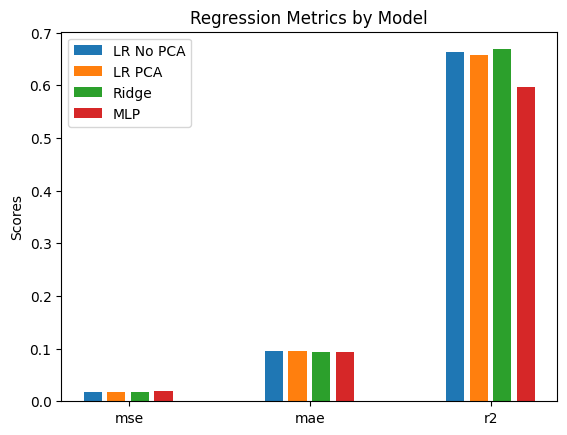

In [43]:
# 2.7.2

import matplotlib.pyplot as plt
import numpy as np

models = [lr_test_results, lr_pca_test_results, ridge_test_results, mlp_test_results]
metrics = lr_test_results.keys()

x = np.arange(len(metrics))
width = 0.1

fig, ax = plt.subplots()
for i, model in enumerate(models):
    values = [model['mse'], model['mae'], model['r2']]
    rects = ax.bar(x + i * (width + 0.03), values, width, label=metric)

ax.set_ylabel('Scores')
ax.set_title('Regression Metrics by Model')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics)
ax.legend(['LR No PCA', 'LR PCA', 'Ridge', 'MLP'])

plt.show()


the models all have very similar performance, with the ridge model being the strongest.

it seems that the dataset is somewhat well captured by linear models, as evidenced by their similar performances and overall stronger performance than the MLP model.

in addition, the generally similar performances may imply that there may be a considerable amount of noise in the data, since none could fully capture the variance.      